In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

ERROR! Session/line number was not unique in database. History logging moved to new session 59


Using TensorFlow backend.


In [2]:
from google.colab import files

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [19]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wasi17","key":"30b6dc992dafa84ce4e99a8c62aba20a"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
from zipfile import ZipFile 
def unZip(file_name):
  with ZipFile(file_name, 'r') as zip: 
      zip.extractall() 
      print('Done!') 

In [10]:
movie_reviews = pd.read_csv('datasetTB.csv')

movie_reviews.isnull().values.any()

movie_reviews.shape

(662, 2)

In [0]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
X = []
sentences = list(movie_reviews['Texts'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [0]:
y = movie_reviews['labels']

y = np.array(list(map(lambda x: 1 if x==1 else 0, y)))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 27

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [24]:
!kaggle datasets download -d terenceliu4444/glove6b100dtxt

100% 131M/131M [00:01<00:00, 95.1MB/s]



In [25]:
unZip('glove6b100dtxt.zip')

Done!


In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [0]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [33]:
y_train

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [0]:
model = keras.Sequential()
embedding_layer = layers.Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 27, 100)           6100      
_________________________________________________________________
flatten (Flatten)            (None, 2700)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2701      
Total params: 8,801
Trainable params: 2,701
Non-trainable params: 6,100
_________________________________________________________________
None


In [32]:
history = model.fit(X_train, y_train, batch_size=16, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
27/27 [==============================] - 0s 9ms/step - loss: 0.5413 - acc: 0.8227 - val_loss: 0.3664 - val_acc: 0.9906
Epoch 2/6
27/27 [==============================] - 0s 3ms/step - loss: 0.3005 - acc: 0.9905 - val_loss: 0.2282 - val_acc: 1.0000
Epoch 3/6
27/27 [==============================] - 0s 3ms/step - loss: 0.2050 - acc: 0.9905 - val_loss: 0.1609 - val_acc: 1.0000
Epoch 4/6
27/27 [==============================] - 0s 3ms/step - loss: 0.1529 - acc: 0.9976 - val_loss: 0.1215 - val_acc: 1.0000
Epoch 5/6
27/27 [==============================] - 0s 3ms/step - loss: 0.1197 - acc: 0.9976 - val_loss: 0.0960 - val_acc: 1.0000
Epoch 6/6
27/27 [==============================] - 0s 3ms/step - loss: 0.0989 - acc: 0.9976 - val_loss: 0.0783 - val_acc: 1.0000


In [34]:
score = model.evaluate(X_test, y_test, verbose=1)

5/5 [==============================] - 0s 2ms/step - loss: 0.0964 - acc: 1.0000


In [35]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.0964413434267044
Test Accuracy: 1.0


In [38]:
instance = X[10]
print(instance)

right ptb 


In [39]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.498256]], dtype=float32)

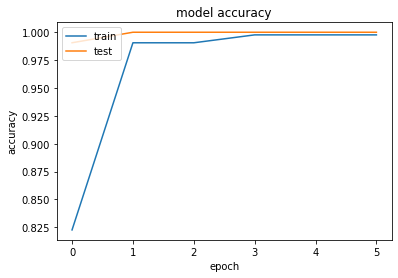

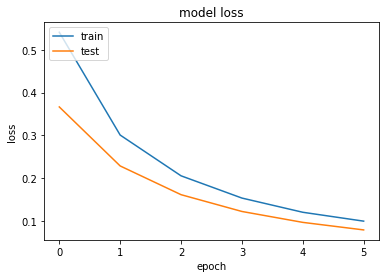

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()